<div align="center">
  <img src="logoinpe.png">
</div>


# Análise Estatística e Espectral de Processos Estocásticos (CAP-239-4)

<hr>

Docentes:
- Dr. Reinaldo Rosa
- Dr. Leonardo B. L. Santos

Discentes:
 - Fernando Cossetin;
 - Felipe Menino Carlos;
 - Felipe Perin.

**Atividade**: Atualização da forma de cálculo do parâmetro $s$ (Passado em live no dia 19/06/2020

**Descrição da atividade**: Adição do novo cálculo de $s$ e da visualização do $s$ médio.

<hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from covidmodeler import (
    covidmodeler, load_owd, generate_fiocruz_datamean,
    WeightSpectraCase1, WeightSpectraCase2, organize_data,
    plot_g_and_s
)

Abaixo os dados são carregados e filtrados para datas superiores ou iguais a `01/04/2020`

In [2]:
data_owd = load_owd()
data_owd = data_owd[data_owd.index >= '2020-04-01']

Para o exemplo de uso da atualização, os dados do Brasil serão utilizados. Abaixo estes são filtrados

In [3]:
data_owd_brazil = data_owd[data_owd["iso_code"] == "BRA"]
data_owd_brazil = generate_fiocruz_datamean(data_owd_brazil)

Abaixo as configurações da predição são definidas

In [4]:
days_to_predict = 20
start_date = '2020-04-08'

plot_date_start = '08/04/2020'
plot_date_end = '28/04/2020'

# Atualização do modelo - 19/06/2020

Esta seção apresenta a atualização do modelo, onde é inserido o parâmetro `use19JuneUpdate`, que faz com que o cálculo de `s` seja feito considerando o valor de `1 - g`.

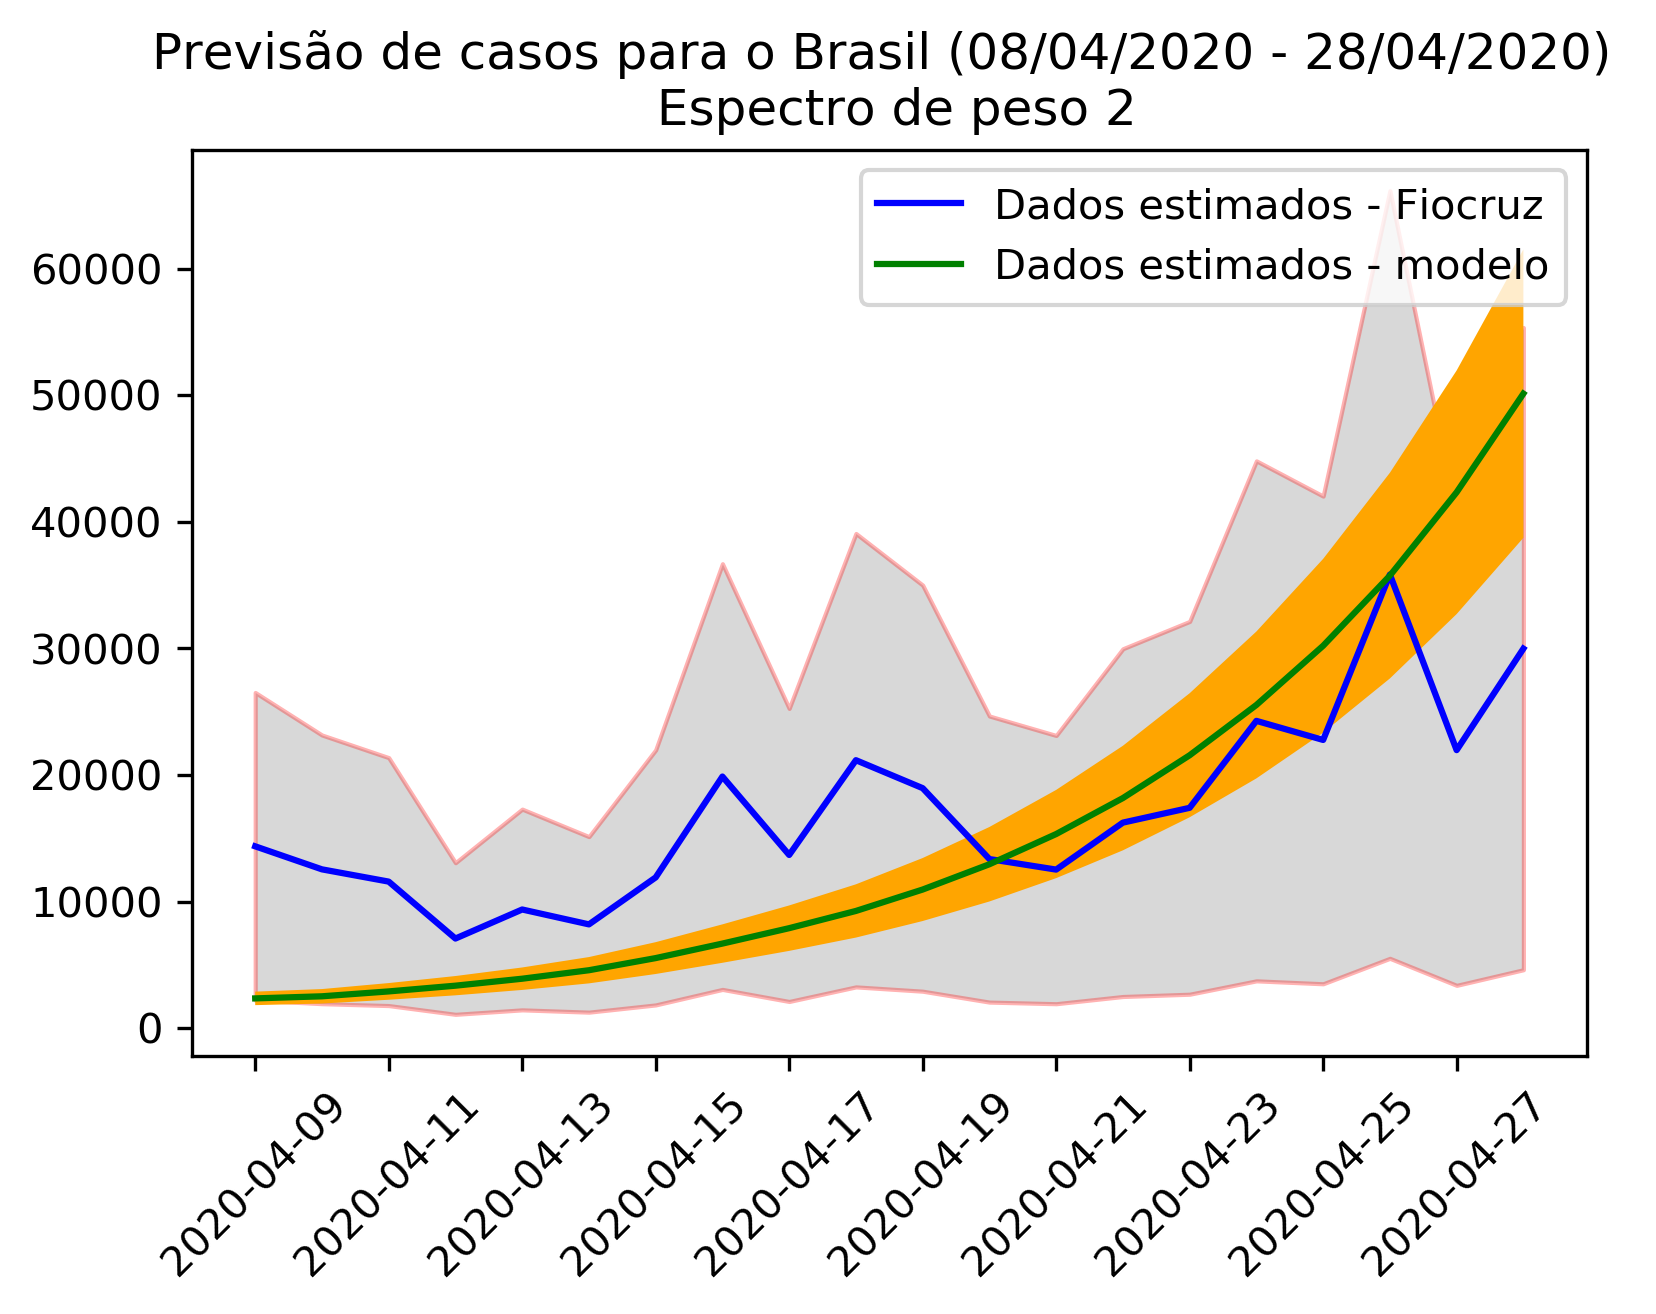

In [5]:
predictedvalues, generated_parameters, generated_supression_parameters = \
                covidmodeler(data_owd_brazil, start_date, days_to_predict, WeightSpectraCase2, 
                             isIncomplete = False, usePredict = True, use19JuneUpdate = True)

prepared_data = organize_data(predictedvalues, generated_parameters, data_owd_brazil)

plt.figure(dpi = 300)
plt.plot(prepared_data.index, prepared_data.fiocruz_mean, 'blue')
plt.fill_between(prepared_data.index, prepared_data.new_cases_x,
                     prepared_data.fiocruz_estimate, alpha = 0.3, edgecolor = 'red', facecolor = 'gray')
plt.plot(prepared_data.index, prepared_data.new_cases_y, 'green')
plt.fill_between(prepared_data.index, prepared_data.nmin, prepared_data.nmax, facecolor = 'orange')
plt.title(f"Previsão de casos para o Brasil ({plot_date_start} - {plot_date_end}) \n Espectro de peso 2")
plt.legend(["Dados estimados - Fiocruz", "Dados estimados - modelo"])
plt.xticks(rotation = 45)
plt.show()

Abaixo é feita a visualização dos elementos $g$ e $s$

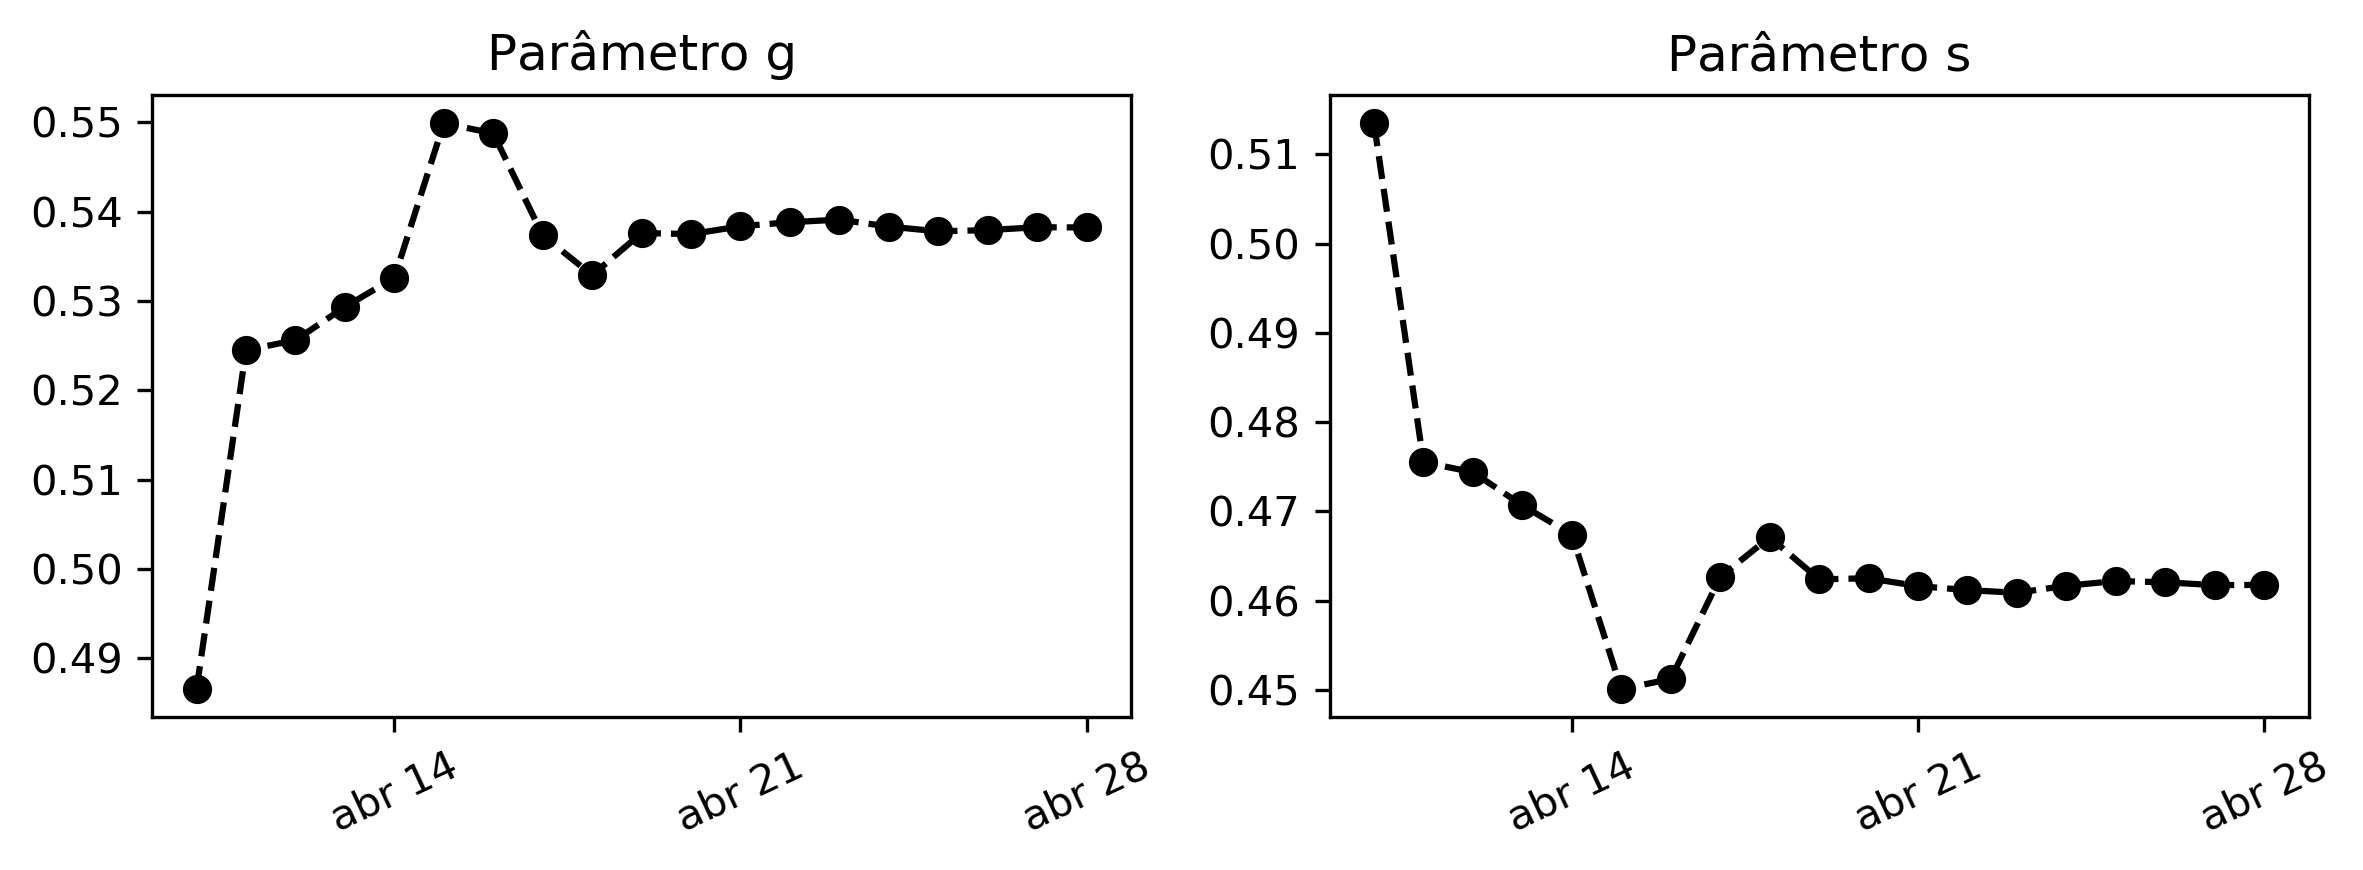

In [6]:
plot_g_and_s(generated_parameters, generated_supression_parameters, use_s_mean = False)

Abaixo é feita a visualização dos elementos $g$ e $s$.

> Para este caso, é considerando, através do parâmetro `use_s_mean`, que o valor de $s$ deve ser gerado através da média de valor. Alternativamente, ao utilizar o parâmetro `use_s_mean`, pode-se definir também o parâmetro `days_to_s_mean`, onde é possível definir a quantidade de dias considerados na média.

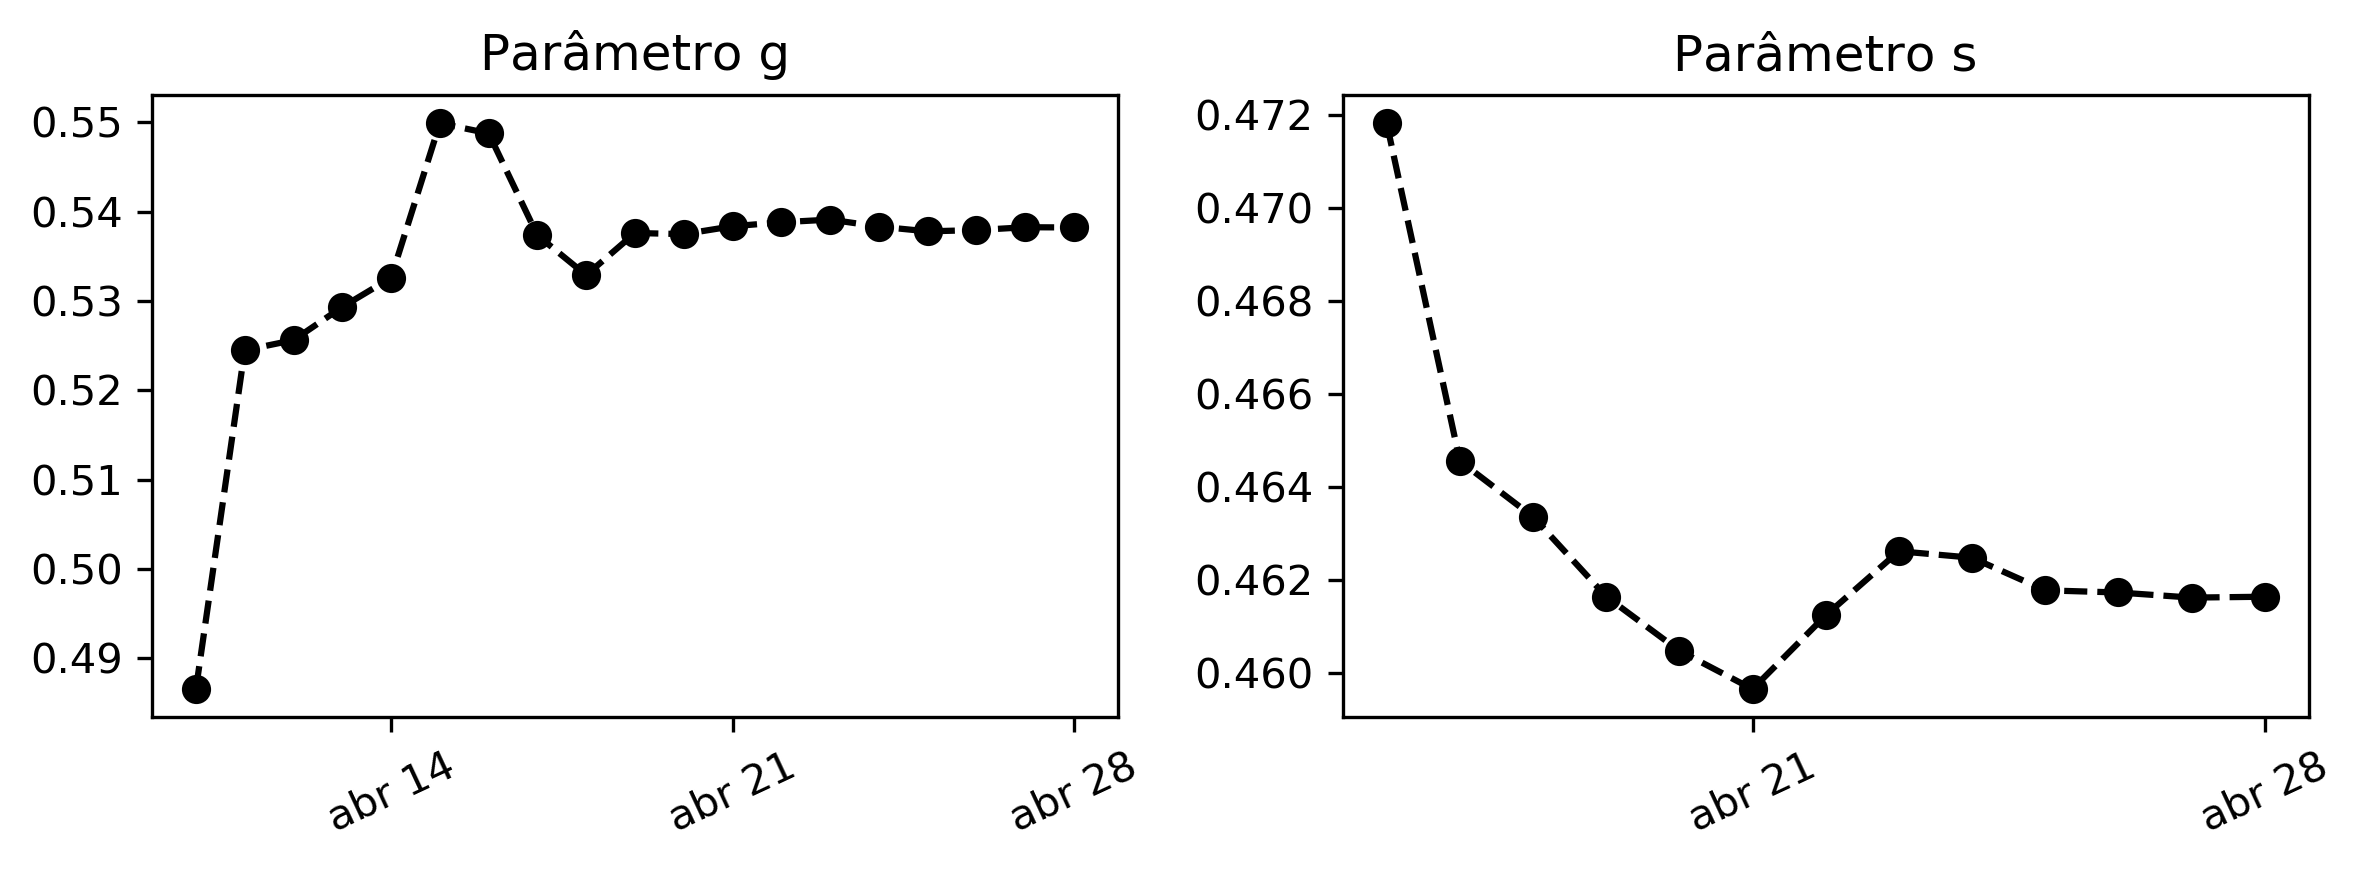

In [7]:
plot_g_and_s(generated_parameters, generated_supression_parameters, use_s_mean = True)

Para exemplificar o uso do parâmetro `use_s_mean` com a mudança do `days_to_s_mean` o código abaixo é apresentado, onde a média considera 10 dias.

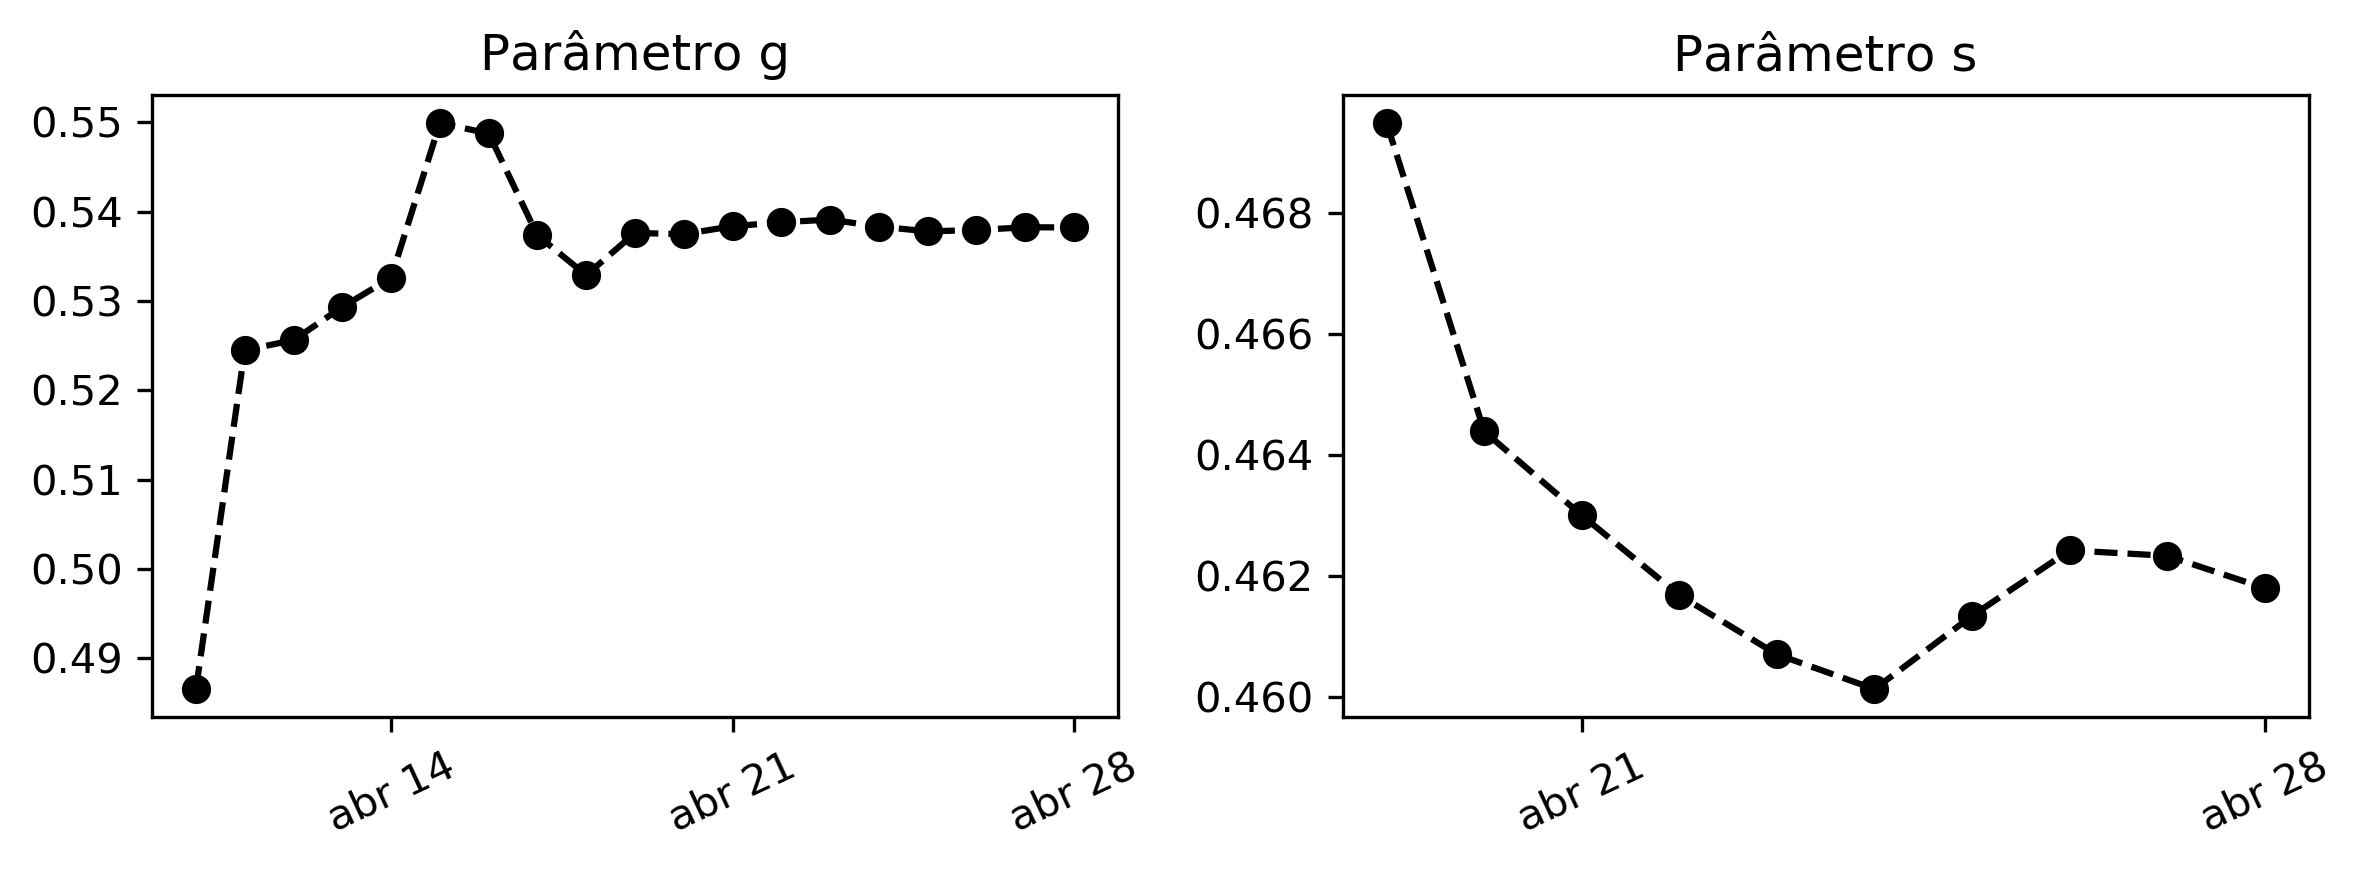

In [8]:
plot_g_and_s(generated_parameters, generated_supression_parameters, use_s_mean = True, days_to_s_mean = 10)